# Predicting Price of House using KNearestNeighbour Regressor


# 1.Use pandas to get some insights into the data (10 marks)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/house_rental_data.txt")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [ ]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [ ]:
df["Floor"].values

array([ 2,  5,  5,  2, 11, 11,  5,  5, 10,  4,  4,  4,  9,  4, 10,  6,  5,
        5,  6,  3, 19,  6,  7,  4, 19, 10, 19, 21,  3,  6,  8, 10, 10,  7,
        5,  3,  5,  4, 19,  6, 21, 10,  2,  1,  7,  6,  2,  2, 19,  4,  7,
        1,  2,  2,  1,  2,  5, 12,  2,  1,  6,  2,  5,  2,  5,  5,  4,  2,
        6,  6,  8,  6,  2,  2,  4,  3,  7,  5,  6,  2,  5,  6,  8,  5,  5,
        2,  4,  7,  2,  7,  5,  5,  2,  5,  5,  4,  6,  3, 13,  5,  2,  2,
        2,  3,  8,  3, 12,  6,  7,  7,  7,  6,  2,  8,  7,  6,  5,  6, 13,
        2, 10, 10,  3,  5,  9,  7,  7,  4,  6,  8,  6,  2, 18,  7,  5,  4,
        6,  3,  2, 10, 19,  6,  7,  3,  5, 10,  6,  3,  6,  3, 10,  6,  2,
       10, 11,  4, 10,  3,  6,  2,  1, 14,  4,  2,  3, 10,  2,  4,  5, 12,
        4,  9,  5, 12,  2, 16,  2,  2,  2,  6,  7,  3,  4,  3,  5,  5,  4,
        3,  3,  2,  3,  2, 12, 11,  2,  8,  8, 13,  5,  3, 14,  9,  2,  3,
        6,  2, 10,  5,  8,  1, 13,  2,  5,  5,  4,  3,  4,  8,  5, 12,  7,
       11,  2, 14,  4,  8

In [ ]:
df["Bathroom"].value_counts()

2    386
1    198
3     46
4     10
5      4
0      1
Name: Bathroom, dtype: int64

In [ ]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [ ]:
df.dtypes  

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [ ]:
df[df.duplicated()]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
21,2768.124,6,19,3,2,2,100000
26,3664.740,19,19,3,2,3,200000
32,2134.800,10,19,3,2,2,55000
48,3735.900,19,19,3,2,3,200000
99,2063.640,5,7,4,2,2,70000
...,...,...,...,...,...,...,...
610,2134.800,3,6,4,2,3,98000
614,711.600,8,14,1,1,1,36000
630,1167.024,2,12,3,2,2,38000
638,1707.840,9,15,3,2,2,80000


In [ ]:
df.duplicated().sum()

66

In [ ]:
df.shape

(645, 7)

In [ ]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=645, step=1)

In [ ]:
df.sort_values(by=['Floor'], inplace=True)

In [ ]:
df['Floor'].unique() # checking unique values in floor column


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22])

# 2.Show some interesting visualization of the data (10 marks)

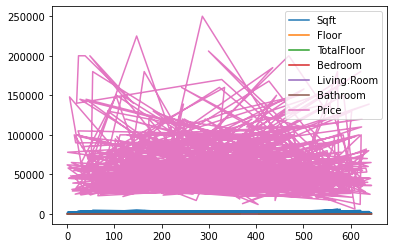

In [ ]:
df.plot()


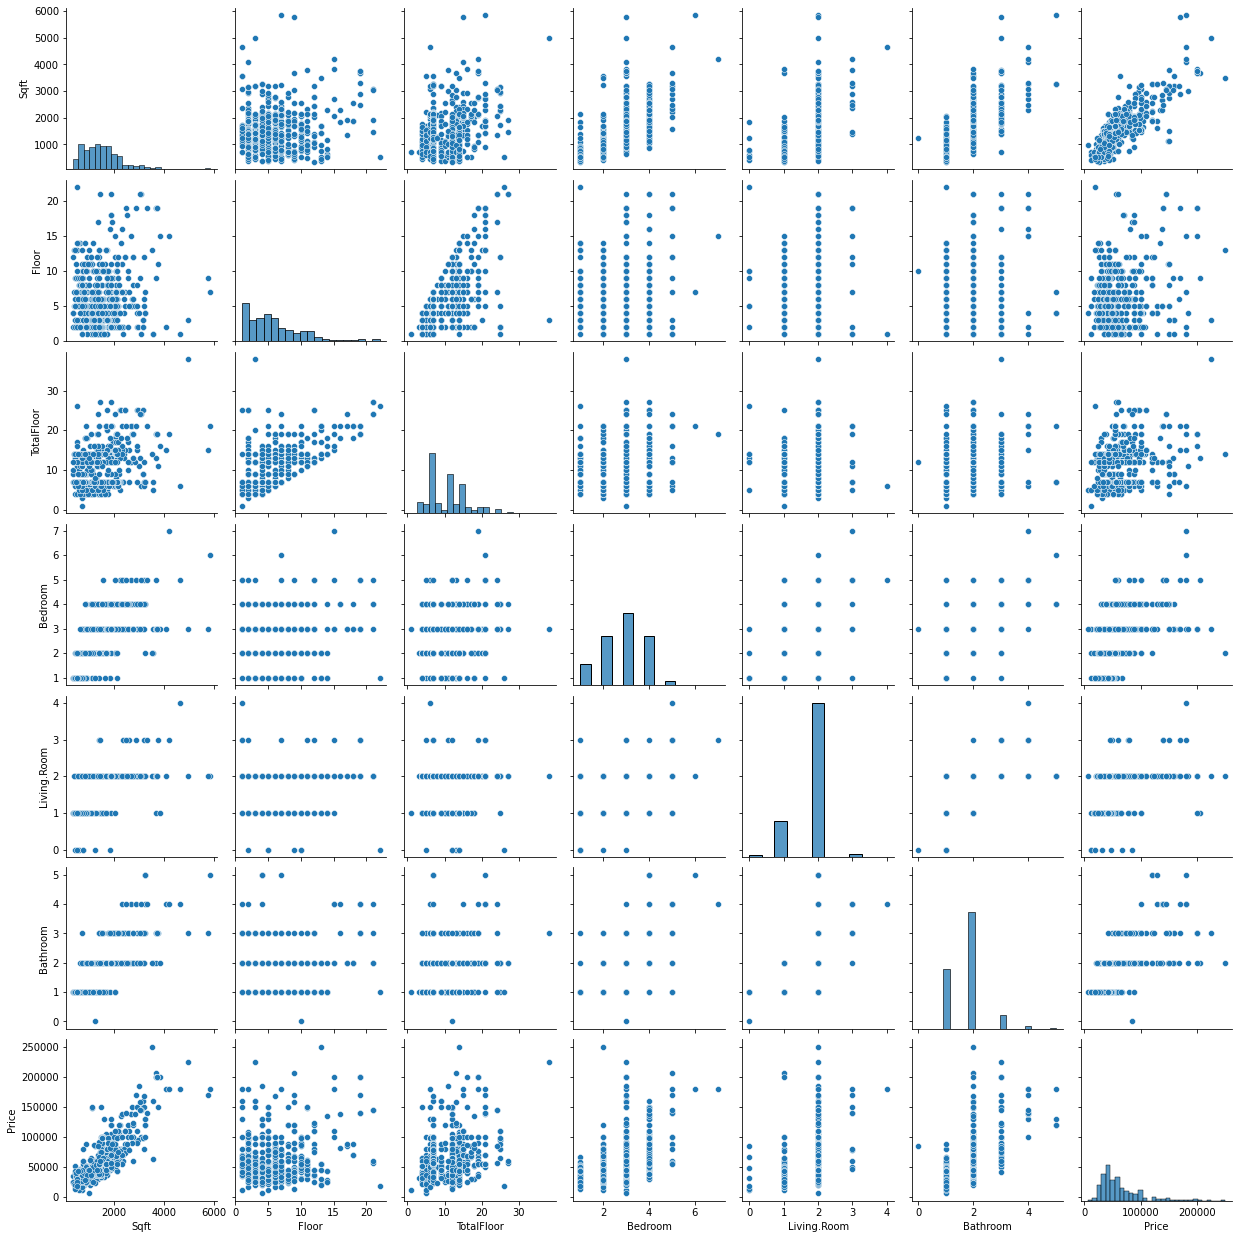

In [ ]:
sns.pairplot(df)

In [ ]:
df.plot.pie(subplots=True, figsize=(15, 15))

NameError: ignored

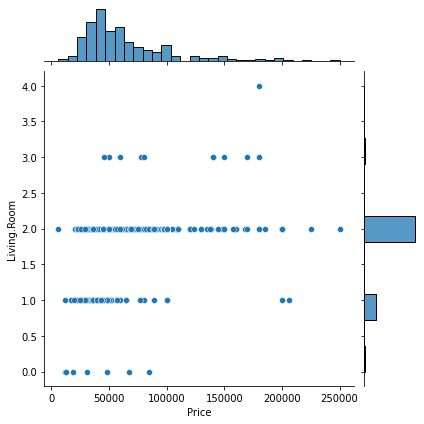

In [ ]:
sns.jointplot(x='Price', y='Living.Room', data=df)

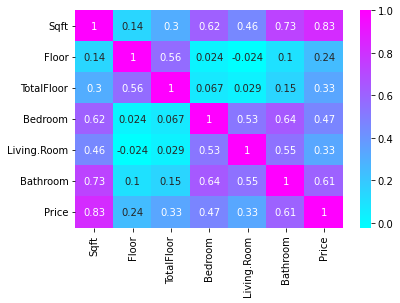

In [ ]:
# heatmap

# it is used to see a co-relation.

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='cool')

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('Price', axis=1).values  # independent variable
y = df['Price'].values     #dependent
x

array([[1.067400e+03, 1.000000e+00, 6.000000e+00, 3.000000e+00,
        2.000000e+00, 2.000000e+00],
       [1.391178e+03, 1.000000e+00, 7.000000e+00, 1.000000e+00,
        3.000000e+00, 3.000000e+00],
       [1.362714e+03, 1.000000e+00, 7.000000e+00, 3.000000e+00,
        2.000000e+00, 2.000000e+00],
       ...,
       [1.458780e+03, 2.100000e+01, 2.700000e+01, 3.000000e+00,
        2.000000e+00, 2.000000e+00],
       [3.059880e+03, 2.100000e+01, 2.400000e+01, 4.000000e+00,
        2.000000e+00, 3.000000e+00],
       [5.372580e+02, 2.200000e+01, 2.600000e+01, 1.000000e+00,
        0.000000e+00, 1.000000e+00]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = .20, random_state=1) 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)   

KNeighborsClassifier()

In [ ]:
knn.score(x_test, y_test)


0.13178294573643412

In [ ]:
x.shape  


(645, 6)

In [ ]:
x_train.shape

(516, 6)

In [ ]:
y_train.shape   


(516,)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import ceil, sqrt


In [ ]:
knr = KNeighborsRegressor()
knr.fit(x_train, y_train)


KNeighborsRegressor()

In [ ]:
y_pred = knr.predict(x_test)

In [ ]:

sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

15757.437568660476

In [ ]:
c = ceil(sqrt(df.shape[0]))
c

26

In [ ]:
for i in range(0, c+1):
    model = KNeighborsRegressor()
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, y_test_pred))
    print(i , error)

0 15757.437568660476
1 15757.437568660476
2 15757.437568660476
3 15757.437568660476
4 15757.437568660476
5 15757.437568660476
6 15757.437568660476
7 15757.437568660476
8 15757.437568660476
9 15757.437568660476
10 15757.437568660476
11 15757.437568660476
12 15757.437568660476
13 15757.437568660476
14 15757.437568660476
15 15757.437568660476
16 15757.437568660476
17 15757.437568660476
18 15757.437568660476
19 15757.437568660476
20 15757.437568660476
21 15757.437568660476
22 15757.437568660476
23 15757.437568660476
24 15757.437568660476
25 15757.437568660476
26 15757.437568660476
